<a href="https://colab.research.google.com/github/dpnnmlai/linear_regression/blob/main/workflow_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check the pytorch verison
torch.__version__  

'1.13.1+cu116'

In [ ]:
# Create *Known* parameters
w = 17
b = 3

# Create a data
start = 0
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b

X[:42], y[:42]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200]]), tensor([[ 3.0000],
         [ 3.3400],
         [ 3.6800],
         [ 4.0200],
         [ 4.3600],
         [ 4.7000],
         [ 5.0400],
         [ 5.3800],
         [ 5.7200],
         [ 6.0600],
 

In [ ]:
# Create train / test split
train_split = int(0.7 * len(X)) # 70% of the data is used for the traning and the 20% for testing]
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[:train_split], y[:train_split]

len (X_train), len(y_train), len(X_test), len(y_test)

(35, 35, 35, 35)

In [ ]:
def plot_predictions(train_data =X_train,
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=None):
  """
  Plots training data, test data and comapres predictions.
  """
  plt.figure(figsize=(8, 6))

  # Plot traning data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot traning data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")


  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12});

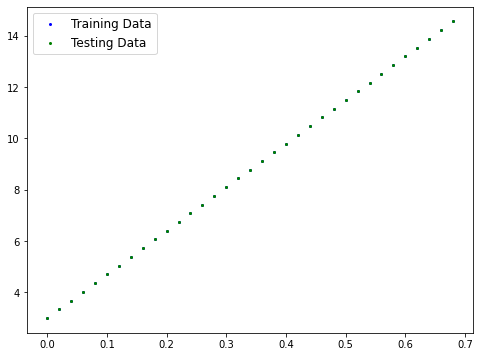

In [ ]:
plot_predictions();

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
# Create a Linear Regression model class 
class L_R_model(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego 
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(42, 
                                            dtype=torch.float,
                                requires_grad=True))
    self.bias = nn.Parameter(torch.randn(42
                                         ,
                                         dtype=torch.float,
                             requires_grad=True))
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied 
torch.manual_seed(42)

# Create an instance of the model (this is subclass of nn.Module )
model_0 = L_R_model()

# Check the nn.paramter(s) within the nn.Module subclass we created.
list(model_0.parameters())

[Parameter containing:
 tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624,
          1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008,  1.6806,
          1.2791,  1.2964,  1.5736, -0.8455,  1.3123,  0.6872, -1.0892, -0.3553,
         -0.9138, -0.6581,  0.0499,  2.2667,  1.1790, -0.4345, -1.3864, -1.2862,
         -1.4032,  0.0360], requires_grad=True), Parameter containing:
 tensor([ 1.8113e+00,  1.6056e-01,  3.6725e-01,  1.7541e-01,  1.3852e+00,
         -4.4585e-01,  1.4451e+00,  8.5641e-01, -1.0759e+00,  5.3565e-01,
          1.1754e+00,  5.6117e-01, -4.5275e-01, -7.7178e-01, -1.7219e-01,
          5.2379e-01,  8.6540e-03, -1.4229e-01,  1.9707e-01, -1.1441e+00,
          3.3832e-01,  1.6992e+00,  1.0868e-02, -3.3874e-01, -8.9808e-02,
          4.5844e-01,  6.4076e-01,  5.8325e-01,  1.0669e+00, -4.5015e-01,
         -6.7875e-01,  5.7432e-01,  1.8775e-01, -3.5762e-

In [ ]:
# List named parameters 

model_0.state_dict()

OrderedDict([('weights',
              tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
                      -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624,
                       1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008,  1.6806,
                       1.2791,  1.2964,  1.5736, -0.8455,  1.3123,  0.6872, -1.0892, -0.3553,
                      -0.9138, -0.6581,  0.0499,  2.2667,  1.1790, -0.4345, -1.3864, -1.2862,
                      -1.4032,  0.0360])),
             ('bias',
              tensor([ 1.8113e+00,  1.6056e-01,  3.6725e-01,  1.7541e-01,  1.3852e+00,
                      -4.4585e-01,  1.4451e+00,  8.5641e-01, -1.0759e+00,  5.3565e-01,
                       1.1754e+00,  5.6117e-01, -4.5275e-01, -7.7178e-01, -1.7219e-01,
                       5.2379e-01,  8.6540e-03, -1.4229e-01,  1.9707e-01, -1.1441e+00,
                       3.3832e-01,  1.6992e+00,  1.0868e-02, -3.3874e-01, -8.9808e-02,
     

In [ ]:
 # make predictions with model 
with torch.inference_mode():
 y_preds = model_0(X_test)

IndentationError: ignored